## Select one road


In [1]:
import file_handler



In [2]:
city = 'tehran'

teh951 = file_handler.get_dayly_data_path_with_year_month_city("1395", "1", "تهران")
s = teh951[0]

In [3]:
s

'/media/amirali/Data2/Data/1395/1/11 \u202bاستان تهران\u202c/\u202bحجم تردد روزانه\u202c/Daily 113201 \u202bآزادراه قم - گرمسار\u202c .xlsx'

In [4]:
def getRoadAddress(year, month, city, code):
    all = file_handler.get_dayly_data_path_with_year_month_city(year, month, city)
    for i in all:
        if code in i:
            return i
    return None


In [160]:
def persian_fix(text):
    return get_display(
        arabic_reshaper.reshape(
            u'%s' % str(text)
        )
    )

def getRoadChart(road):
    city = 'قم'

    roads = []


    for year in range(1395,1403):
        for month in range(1,13):
            item = ''
            try:
                item = getRoadAddress(str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df2 = df.reset_index()
    # df2.iloc[:, [6]].plot(title=persian_fix(road))
    return df2


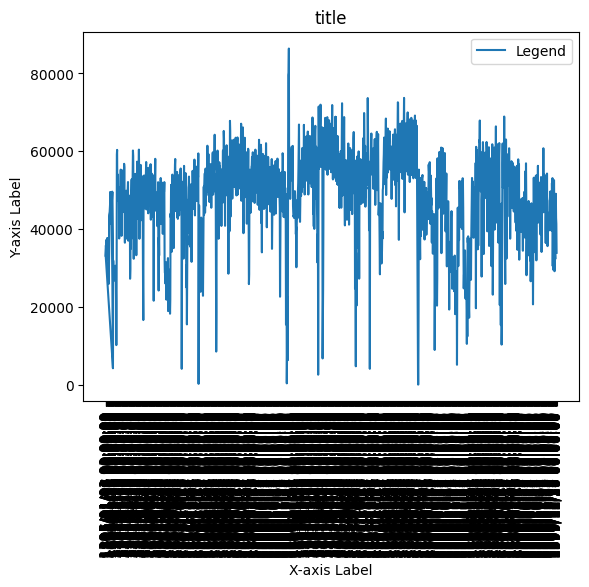

In [91]:
import os
import pandas as pd
import numpy as np
import patoolib
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re

plt.figure()  # Create a new figure for each plot
plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])

# Customize x-axis ticks and labels
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Add more customization as needed

# Add title, labels, legend, etc.
plt.title(persin_fix('title'))
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend(['Legend'])


In [161]:
# get all codes for tehran

codes = file_handler.get_dayly_data_path_with_year_month_city('1395','2','قم')

In [162]:
t = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),codes))
codes = t

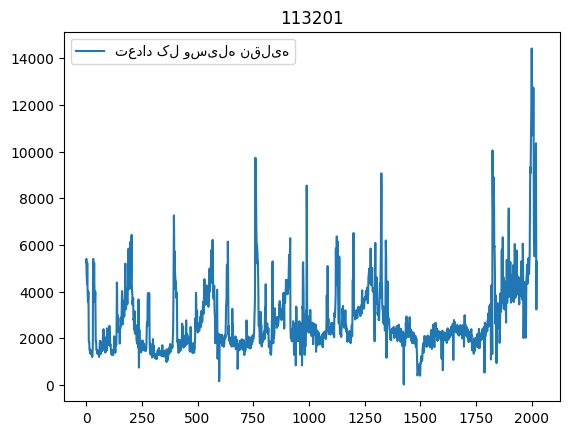

In [92]:
for code in codes:
    getRoadChart(str(code))
    break

In [163]:
from sklearn.linear_model import LinearRegression
for i in  range(len(codes)):
    model = LinearRegression()
    s = codes[i]
    df = getRoadChart(s)
    df=df.reset_index()

    y = df['تعداد کل وسیله نقلیه']
    x = df[['level_0']]
    y
    model.fit(x, y)

    # # Evaluate the model
    print(s)
    r2_score = model.score(x, y)
    print(str(model.coef_) + ", " + str(model.intercept_))
    print(f"R-squared value: {r2_score}")
    print("------")



143101
[-0.02459833], 4633.406397026626
R-squared value: 0.00012398218981535258
------
143102
[0.41546036], 6383.127682079055
R-squared value: 0.010790772613649136
------
143103
[1.02533424], 1720.3390927069086
R-squared value: 0.20235899029162374
------
143104
[-0.40290536], 6675.608480932099
R-squared value: 0.02928781910290701
------
143105
[-0.77987045], 19421.282638148936
R-squared value: 0.006455697406336669
------
143107
[0.42149511], 28914.192877270216
R-squared value: 0.00040728847292426096
------
143108
[2.06311056], 10169.103153898419
R-squared value: 0.059188404776364556
------
143109
[1.50810237], 7357.186752843745
R-squared value: 0.12509566471671885
------
143110
[0.48093166], 16205.84404422264
R-squared value: 0.0031114547264399217
------
143111
[1.41479512], 5275.871065428106
R-squared value: 0.27449588224464816
------
143113
[1.1908535], 2178.504476475003
R-squared value: 0.19902245402766294
------
143114
[1.02506093], 2893.830773918896
R-squared value: 0.197768574862

AttributeError: 'LinearRegression' object has no attribute 'coeff_'

In [149]:
df

,level_0,index,کد محور,نام محور,زمان شروع,زمان پایان,مدت زمان کارکرد(دقیقه),تعداد کل وسیله نقلیه,تعداد وسیله نقلیه کلاس 1,تعداد وسیله نقلیه کلاس 2,...,تعداد وسیله نقلیه کلاس 5,سرعت متوسط,تعداد تخلف سرعت غیرمجاز,تعداد تخلف فاصله غیرمجاز,تعداد تخلف سبقت غیرمجاز,تعداد برآورد شده,مدت زمان کارکرد (دقیقه),تعداد تخلف سرعت غیر مجاز,تعداد تخلف فاصله غیر مجاز,تعداد تخلف سبقت غیر مجاز
0,0,0,113204,تهران - ساوه (ابتداي آزادراه),1395/01/01 00:00:00,1395/01/02 01:00:00,1475.0,43583,42073,1004,...,95,76.79,210.0,6423.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,1,113204,تهران - ساوه (ابتداي آزادراه),1395/01/02 01:00:00,1395/01/03 00:00:00,1355.0,40427,38728,1029,...,178,77.93,178.0,6015.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2,113204,تهران - ساوه (ابتداي آزادراه),1395/01/03 00:00:00,1395/01/04 00:00:00,1425.0,41353,39394,1179,...,175,74.76,166.0,5848.0,0.0,NaN,NaN,NaN,NaN,NaN
3,3,3,113204,تهران - ساوه (ابتداي آزادراه),1395/01/04 00:00:00,1395/01/05 00:00:00,1430.0,41606,39651,1151,...,180,75.76,98.0,6285.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,4,113204,تهران - ساوه (ابتداي آزادراه),1395/01/05 00:00:00,1395/01/06 00:00:00,1430.0,43193,40791,1496,...,243,77.03,200.0,6602.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1789,28,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/04/29 00:00:00,1401/04/30 00:00:00,NaN,59648,54095,3037,...,1409,74.00,NaN,NaN,NaN,84918.0,1080.0,23156.0,13585.0,0.0
1790,1790,29,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/04/30 00:00:00,1401/04/31 00:00:00,NaN,75870,69956,3201,...,1414,77.00,NaN,NaN,NaN,88894.0,1285.0,34208.0,17629.0,0.0
1791,1791,30,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/04/31 00:00:00,1401/05/01 00:00:00,NaN,53658,51282,1192,...,497,83.00,NaN,NaN,NaN,65530.0,1190.0,31501.0,7867.0,0.0
1792,1792,0,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/05/01 00:00:00,1401/05/02 00:00:00,NaN,69352,63282,3246,...,1518,78.00,NaN,NaN,NaN,86258.0,1215.0,32528.0,15240.0,0.0


TypeError: getRoadAddress() missing 3 required positional arguments: 'month', 'city', and 'code'

,تعداد کل وسیله نقلیه
0,5257
1,5397
2,4778
3,4525
4,4340
...,...
2020,5975
2021,3232
2022,5300
2023,4543
